# Анализ бизнес-показателей приложения Procrastinate Pro+

## Изучение и предобработка данных

**Откроем файлы и изучим их содержимое**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
try:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('D:\Файлы с ноута\! Аналитик данных (Яндекс)\МОДУЛЬ 2\Проект Юнит-экономика\visits_info_short.csv')
    orders = pd.read_csv('D:\Файлы с ноута\! Аналитик данных (Яндекс)\МОДУЛЬ 2\Проект Юнит-экономика\orders_info_short.csv')
    costs = pd.read_csv('D:\Файлы с ноута\! Аналитик данных (Яндекс)\МОДУЛЬ 2\Проект Юнит-экономика\costs_info_short.csv')
display(visits.head())
display(orders.head())
display(costs.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [3]:
# приведем названия колонок к нижнему регистру
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()
# приведем к snake_case
visits = visits.rename(
    columns = {
        'user id': 'user_id', 'region': 'region', 'device': 'device', 'channel': 'channel', 'session start': 'session_start',
       'session end': 'session_end'}
)
orders = orders.rename(
    columns = {'user id': 'user_id', 'event dt': 'event_dt', 'revenue': 'revenue'}
)
display(visits.columns)
display(orders.columns)
display(costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Index(['dt', 'channel', 'costs'], dtype='object')

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [6]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В датасетах нет пропусков.

In [7]:
# преобразуем данные о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [8]:
# проверим
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [11]:
# проверка на наличие явных дубликатов
visits.duplicated().sum()

0

In [12]:
orders.duplicated().sum()

0

In [13]:
costs.duplicated().sum()

0

В датасетах нет дубликатов.

## Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Функции для вычисления значений метрик:

In [14]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [15]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [16]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']


# функция для группировки таблицы по желаемым признакам

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [17]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функции для построения графиков:

In [18]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [19]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [20]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [21]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

**Составим профили пользователей**

In [22]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [23]:
max_date = profiles['dt'].max()
min_date = profiles['dt'].min()

display(min_date)
display(max_date)

datetime.date(2019, 5, 1)

datetime.date(2019, 10, 27)

Границы периода соответствуют заявленным в описании (с 1 мая по 27 октября 2019 года).

**Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей**

In [24]:
(
    profiles.groupby('region').agg({'user_id': 'count', 'payer': 'mean'})
    .sort_values('payer', ascending=False)
    .rename(columns={'user_id': 'Число пользователей',
                      'payer': '% платящих пользователей'})
    .style.format({'% платящих пользователей':"{:,.1%}"})
)

,Число пользователей,% платящих пользователей
region,,
United States,100002,6.9%
Germany,14981,4.1%
UK,17575,4.0%
France,17450,3.8%


Пользователи приходят в приложение из США, Германии, Великобритании и Франции. Лидерами по числу пользователей являются Соединенные Штаты Америки: из более 100 тысяч клиентов 6,9% - платящие пользователи.

**Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи**

In [25]:
(
    profiles.groupby('device').agg({'user_id': 'count', 'payer': 'mean'})
    .sort_values('payer', ascending=False)
    .rename(columns={'user_id': 'Число пользователей',
                      'payer': '% платящих пользователей'})
    .style.format({'% платящих пользователей':"{:,.1%}"})
)

,Число пользователей,% платящих пользователей
device,,
Mac,30042,6.4%
iPhone,54479,6.2%
Android,35032,5.9%
PC,30455,5.0%


Наибольший процент платящих пользователей приходится на клиентов, использующих продукцию марки Apple: Mac - 6,4%, iPhone - 6,2%. 

Чаще всего приложение устанавливают на iPhone, реже - на смартфоны на базе Android, еще реже на персональные компьютеры.

**Определим каналы, из которых пришло больше всего платящих пользователей**

In [26]:
(
    profiles.groupby('channel').agg({'user_id': 'count', 'payer': 'mean'})
    .sort_values('payer', ascending=False)
    .rename(columns={'user_id': 'Число пользователей',
                      'payer': '% платящих пользователей'})
    .style.format({'% платящих пользователей':"{:,.1%}"})
)

,Число пользователей,% платящих пользователей
channel,,
FaceBoom,29144,12.2%
AdNonSense,3880,11.3%
lambdaMediaAds,2149,10.5%
TipTop,19561,9.6%
RocketSuperAds,4448,7.9%
WahooNetBanner,8553,5.3%
YRabbit,4312,3.8%
MediaTornado,4364,3.6%
LeapBob,8553,3.1%


Больше всего платящих пользователей (от 9,6% до 12,2%) пришло из FaceBoom, AdNonSense, lambdaMediaAds и TipTop. 

Меньше всего платящих среди "органических" пользователей (всего 2,1%), хотя этот канал и самый многочисленный (более 56 тысяч пользователей).

In [27]:
# посмотрим с какими регионами работают разные каналы
profiles.pivot_table(index='channel', columns='region', values='user_id', aggfunc='count')

region,France,Germany,UK,United States
channel,,,,
AdNonSense,1366.0,1219.0,1295.0,NaN
FaceBoom,NaN,NaN,NaN,29144.0
LeapBob,2988.0,2519.0,3046.0,NaN
MediaTornado,NaN,NaN,NaN,4364.0
OppleCreativeMedia,2991.0,2562.0,3052.0,NaN
RocketSuperAds,NaN,NaN,NaN,4448.0
TipTop,NaN,NaN,NaN,19561.0
WahooNetBanner,2971.0,2579.0,3003.0,NaN
YRabbit,NaN,NaN,NaN,4312.0


C Европой и США работают разные каналы. AdNonSense, LeapBob, OppleCreativeMedia, WahooNetBanner и lambdaMediaAds работают с пользователями из Франции, Германии и Великобритании; FaceBoom, MediaTornado, RocketSuperAds, TipTop и YRabbit - с пользователями из США.

**Выводы**

Пользователи приходят в приложение из США, Германии, Великобритании и Франции. Лидерами по числу пользователей являются Соединенные Штаты Америки (более 100 тысяч клиентов, из которых 6,9% - платящие пользователи). 
В целом среди пользователей популярнее мобильные устройства.

Больше всего платящих пользователей пришло из FaceBoom, TipTop (работают на американском рынке), AdNonSense и lambdaMediaAds (работают с европейскими пользователями).

## Маркетинг

### Посчитаем общую сумму расходов на маркетинг и посмотрим как траты распределены по рекламным источникам

In [50]:
# общая сумма затрат
round(costs['costs'].sum(),1)

105497.3

In [29]:
# распределение по каналам
costs.groupby('channel').agg({'costs': 'sum'}).sort_values('costs', ascending=False).style.format("{:.1f}")

,costs
channel,
TipTop,54751.3
FaceBoom,32445.6
WahooNetBanner,5151.0
AdNonSense,3911.2
OppleCreativeMedia,2151.2
RocketSuperAds,1833.0
LeapBob,1797.6
lambdaMediaAds,1557.6
MediaTornado,954.5


В рассматриваемом периоде расходы на маркетинг составили 105,5 тысяч долларов. Больше половины от этой суммы ушло на привлечение пользователей через канал TipTop, ещё около 30% бюджета было потрачено на FaceBoom.

Посмотрим на динамику изменения расходов на маркетинг по месяцам и неделям.

Так как "органические" пользователи пришли сами и маркетинговый бюджет не тратился, то и в дальнейших расчетах канал привлечения "organic" учитывать не будем, чтобы избежать искажений в результатах.

In [30]:
# выделяем номера месяцев и недель
profiles['dt'] = pd.to_datetime(profiles['dt'])
profiles['dt_month'] = profiles['dt'].dt.month
profiles['dt_week'] = profiles['dt'].dt.isocalendar().week

In [31]:
# отсекаем данные по органическим пользователям
profiles = profiles.query('channel != "organic"')

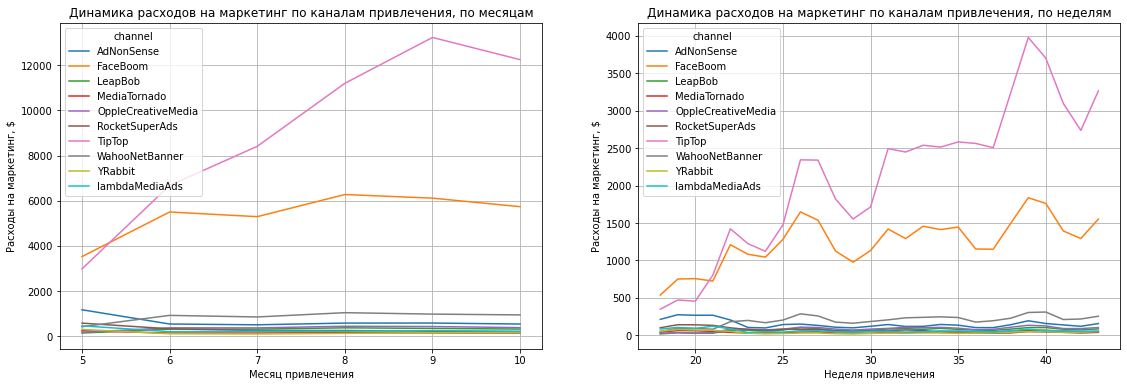

In [32]:
# строим график истории изменений расходов на маркетинг по каналам привлечения

plt.figure(figsize = (19, 6))

profiles.pivot_table(
    index='dt_month', columns='channel', values='acquisition_cost', aggfunc='sum'
).plot(grid=True, ax=plt.subplot(1, 2, 1))
plt.ylabel('Расходы на маркетинг, $')
plt.xlabel('Месяц привлечения')
plt.title('Динамика расходов на маркетинг по каналам привлечения, по месяцам')

profiles.pivot_table(
    index='dt_week', columns='channel', values='acquisition_cost', aggfunc='sum'
).plot(grid=True, ax=plt.subplot(1, 2, 2))
plt.ylabel('Расходы на маркетинг, $')
plt.xlabel('Неделя привлечения')
plt.title('Динамика расходов на маркетинг по каналам привлечения, по неделям')

plt.show()

На протяжении всего периода наблюдения больше всего денег тратилось на привлечение клиентов через TipTop и FaceBoom. При этом расходы на FaceBoom хоть и выросли в июне относительно мая, но дальше оставать примерно на одном уровне. А вот расходы на TipTop постоянно росли от месяца к месяцу и к сентябрю 2019 года превысели уровень мая более, чем в 4 раза.

### Рассчитаем среднюю стоимость привлечения одного пользователя (CAC) из каждого источника

In [33]:
(
    profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean')
    .sort_values('acquisition_cost', ascending=False)
    .style.format("{:.2f}")
)

,acquisition_cost
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


In [1]:
display(f"Средний САС по проекту составляет {round(profiles['acquisition_cost'].mean(), 2)} долл за пользователя")
display(f"Медианный САС по проекту составляет {round(profiles['acquisition_cost'].median(), 2)} долл за пользователя")

SyntaxError: f-string: unmatched '[' (55519772.py, line 1)

Дороже всего обходятся пользователи, пришедшие из TipTop - в среднем по 2,8 доллара за нового пользователя. Это в 2,5 раза дороже средней стоимости привлечения нового пользователя через FaceBoom или AdNonSense и почти в 4 раза дороже, чем из lambdaMediaAds. При этом, как мы помним, доля платящих пользователей среди пользователей из FaceBoom, AdNonSense и lambdaMediaAds выше, чем среди пользователей из TipTop. 

*В среднем стоимость привлечения одного нового пользователя обходится в 1,1 долларов.*

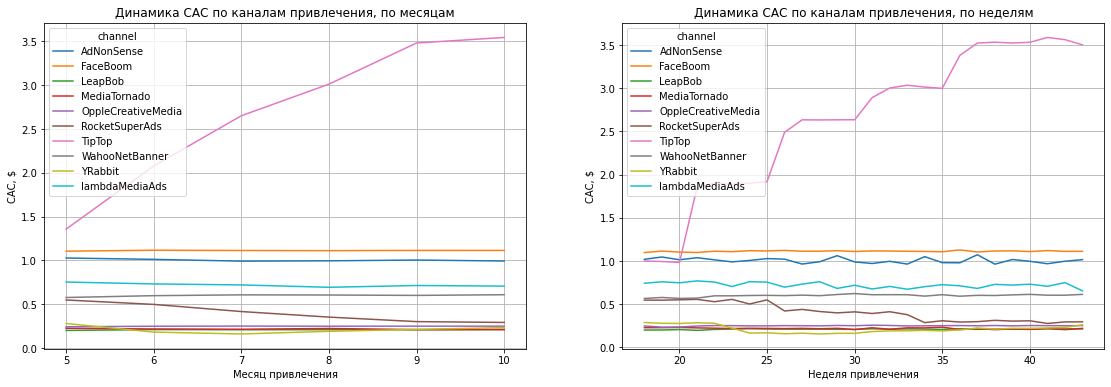

In [34]:
# строим график истории изменений CAC по каналам привлечения

plt.figure(figsize = (19, 6))

profiles.pivot_table(
    index='dt_month', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, ax=plt.subplot(1, 2, 1))
plt.ylabel('CAC, $')
plt.xlabel('Месяц привлечения')
plt.title('Динамика САС по каналам привлечения, по месяцам')

profiles.pivot_table(
    index='dt_week', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, ax=plt.subplot(1, 2, 2))
plt.ylabel('CAC, $')
plt.xlabel('Неделя привлечения')
plt.title('Динамика САС по каналам привлечения, по неделям')

plt.show()

САС стабилен по всем каналам, кроме TipTop - стоимость привлечения одного пользователя поднимается каждые 5 недель и за 4 месяца (с мая по сентябрь) выросла почти в 3,5 раза.

**Вывод**

Больше половины маркетингового бюджета тратится на привлечение пользователей через канал TipTop и ещё около 30% - на FaceBoom. При этом, средняя стоимость одного пользователя, пришедшего из TipTop, в 2,5 раза выше стоимости одного пользователя, пришедшего из FaceBoom. С учетом того, что процент платящих пользователей среди пользователей FaceBoom выше, чем среди пользователей из TipTop, можно предположить, что маркетинговый бюджет распределён по каналам не эффективно.

## Оценка окупаемости рекламы

### Проанализируем окупаемость рекламы c помощью графиков LTV, CAC и ROI

In [35]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
profiles['dt'] = pd.to_datetime(profiles['dt']).dt.date

observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14 # горизонт анализа

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

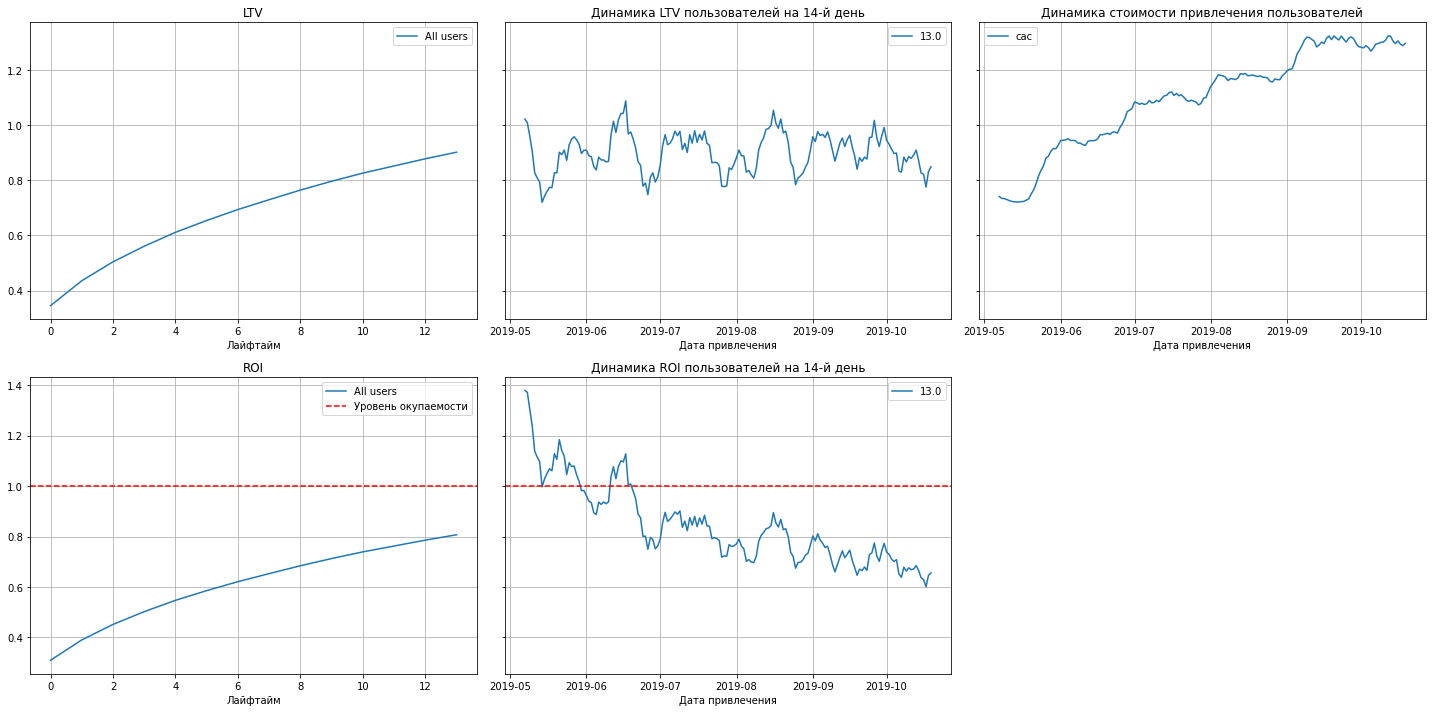

In [36]:
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Реклама не окупается - ROI на 14-й день чуть выше 80%. Стоимость привлечения пользователей постоянно растёт, а окупаемость клиентов (ROI пользователей) стабильно падает. LTV стабилен.

### Построим графики конверсии и удержания

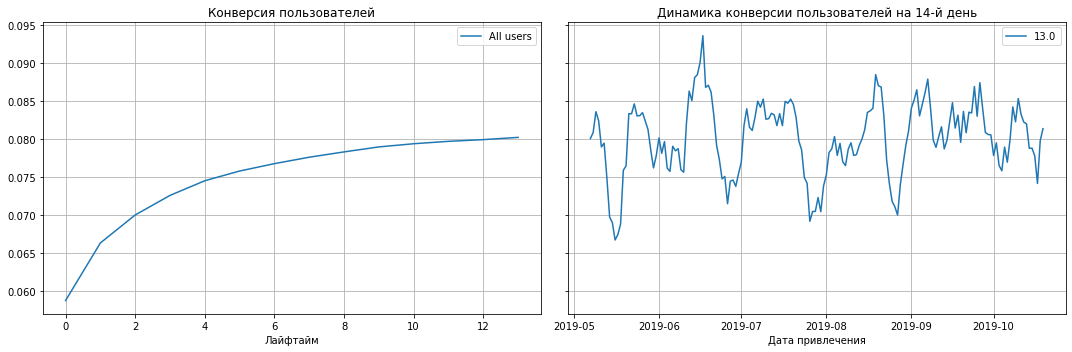

In [37]:
# смотрим общую конверсию

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 


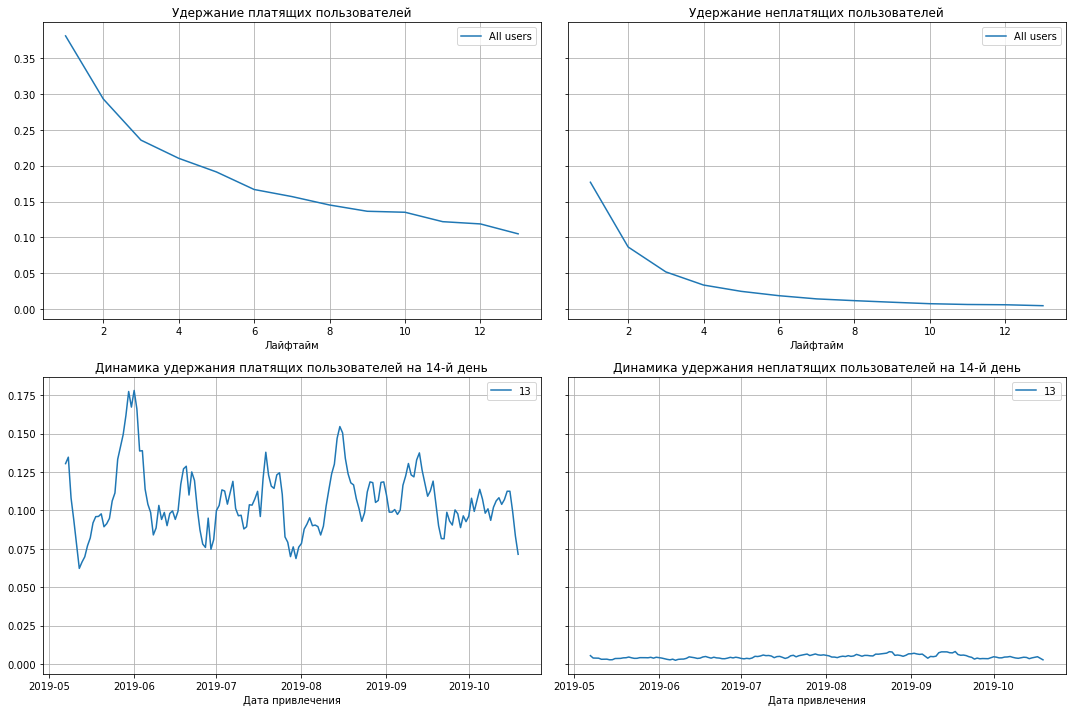

In [38]:
# смотрим общее удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 


Общий уровень конверсии довольно не плохой и составляет 80%. Удержание платящих пользователей выше, чем неплатящих, что соответствут ожиданиям. В динамике и конверсия, и удержание на 14-й день также ведут себя стабильно.

Рассмотрим эти показатели в разбивке по каналам, устройствам и регионам.

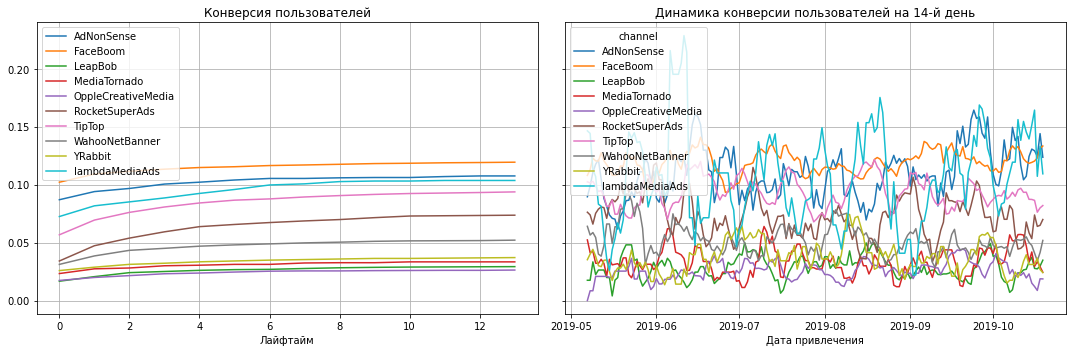

In [39]:
# смотрим конверсию с разбивкой по каналам

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

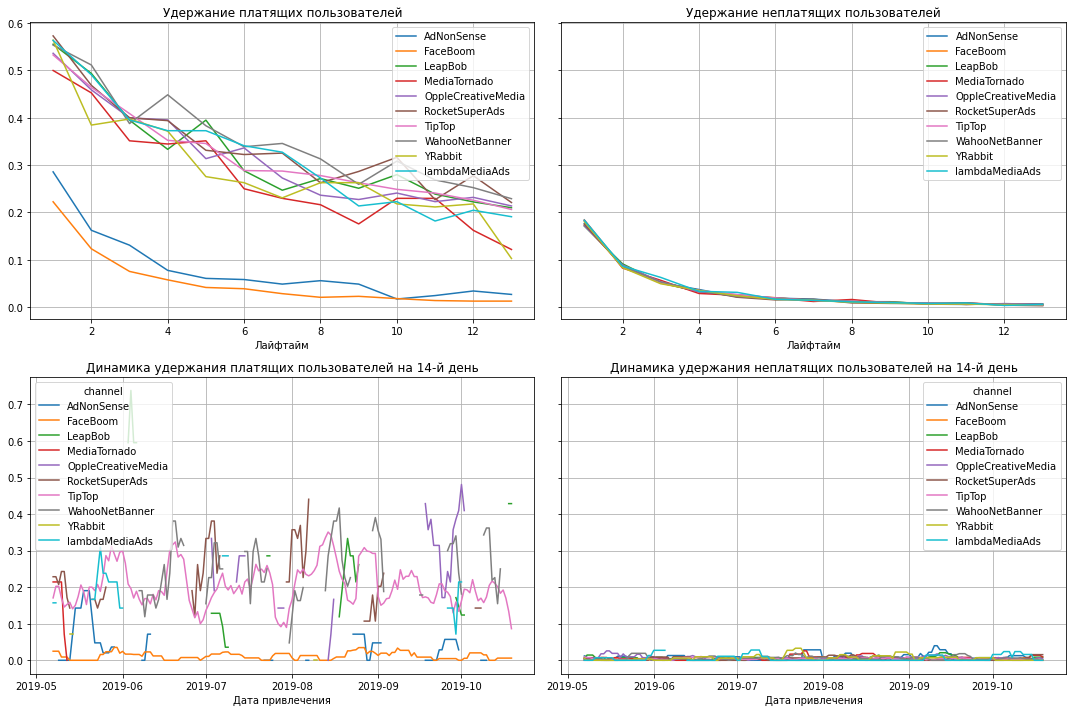

In [40]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи, пришедшие из каналов FaceBoom и AdNonSense, показывают наибольшую конверсию, но при этом плохо удерживаются - к концу второй недели показатель удержания практически равен нулю. Возможно, на этих каналах как-то не правильно подается информация о приложении, поэто пользователи быстро разочаровываются и уходят.

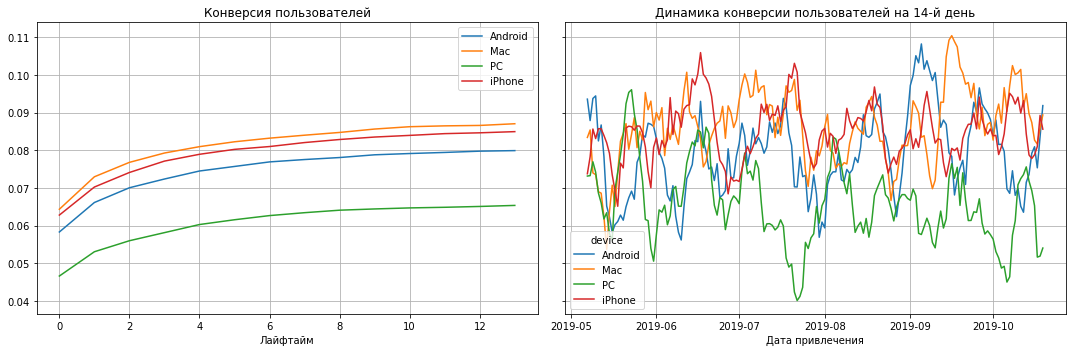

In [41]:
# смотрим конверсию с разбивкой по устройствам

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

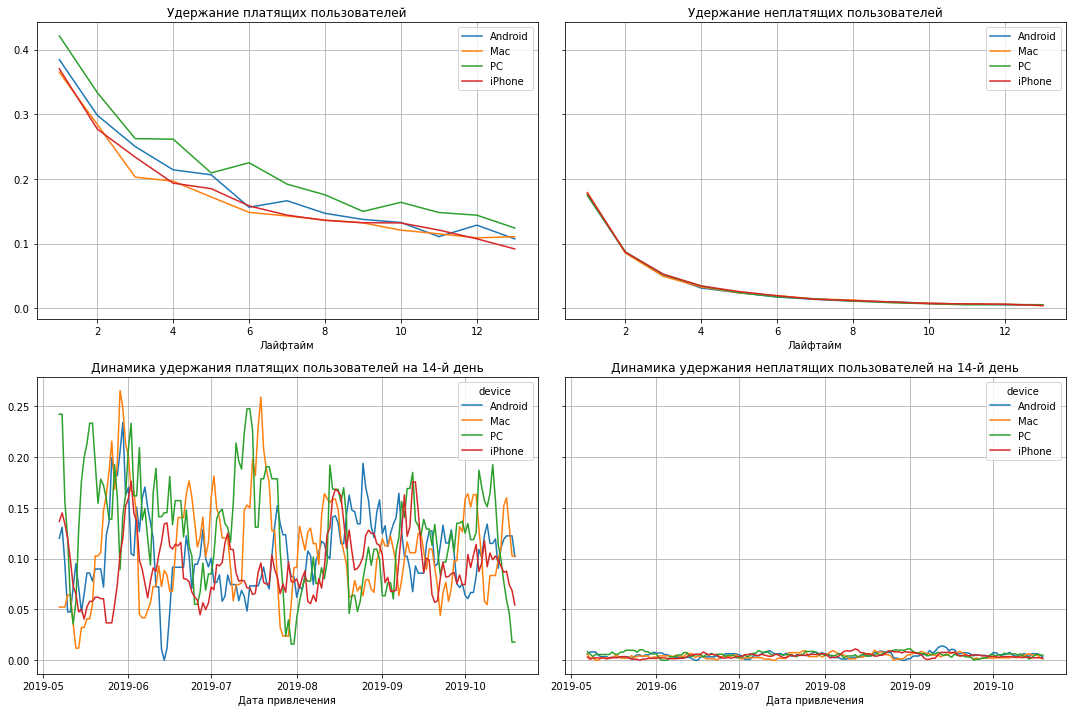

In [42]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

В разбивке по типам устройств хуже всего конвертируются пользователи, использующие персональные компьютеры (PC) - на исходе второй недели их конверсия составляет меньше 7%. Остальные устройства показывают стабильную конверсию от 8% до 9%. Удерживаются же все пользователи одинаково хорошо на протяжении всего горизонта анализа.

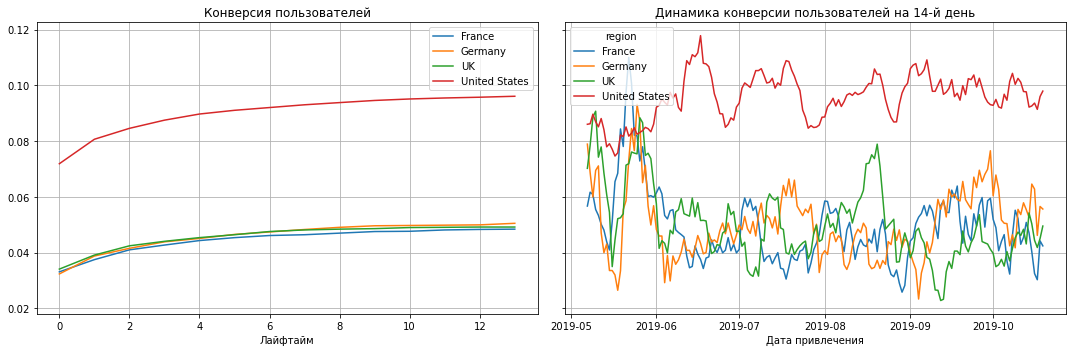

In [43]:
# смотрим конверсию с разбивкой по странам

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

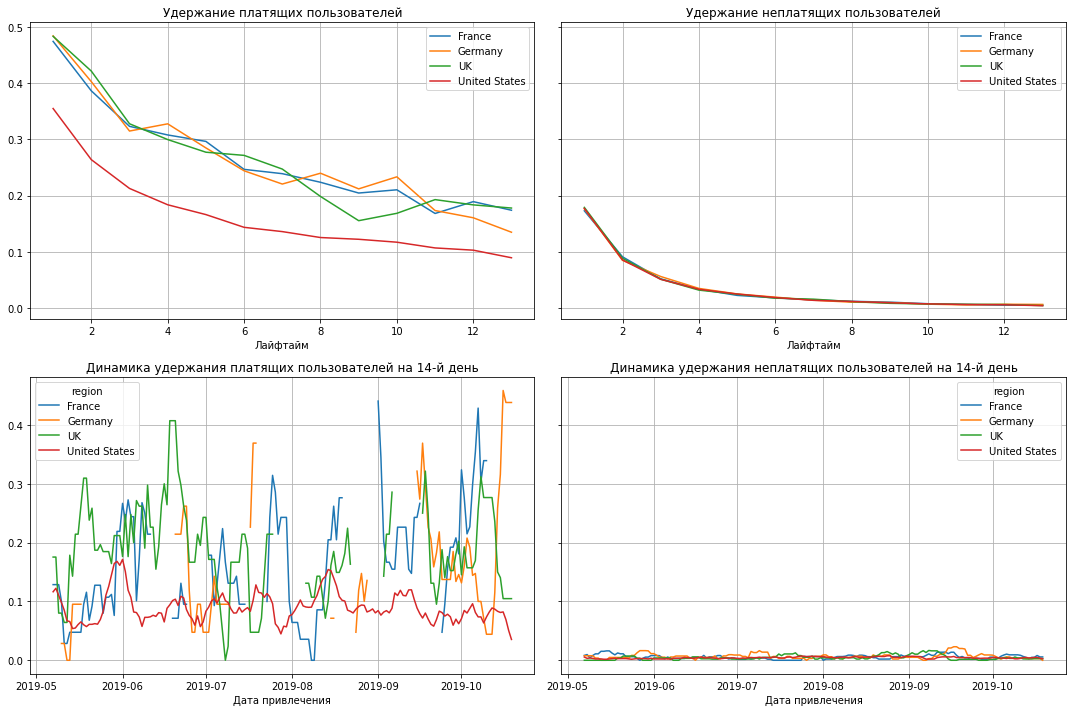

In [44]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Наибольшую конверсию показывают пользователи их США - к концу второй недели их конверсия достигает почти 10%, в то время, как аналогичный показатель по остальным странам в том же периоде едва ли превышает 5%. В то же время, пользователи из США хуже удерживаются. Для платящих пользователей из США удержание 14-го дня ниже, чем из других стран, примерно на 10%.

### Посмотрим на окупаемость рекламы в целом

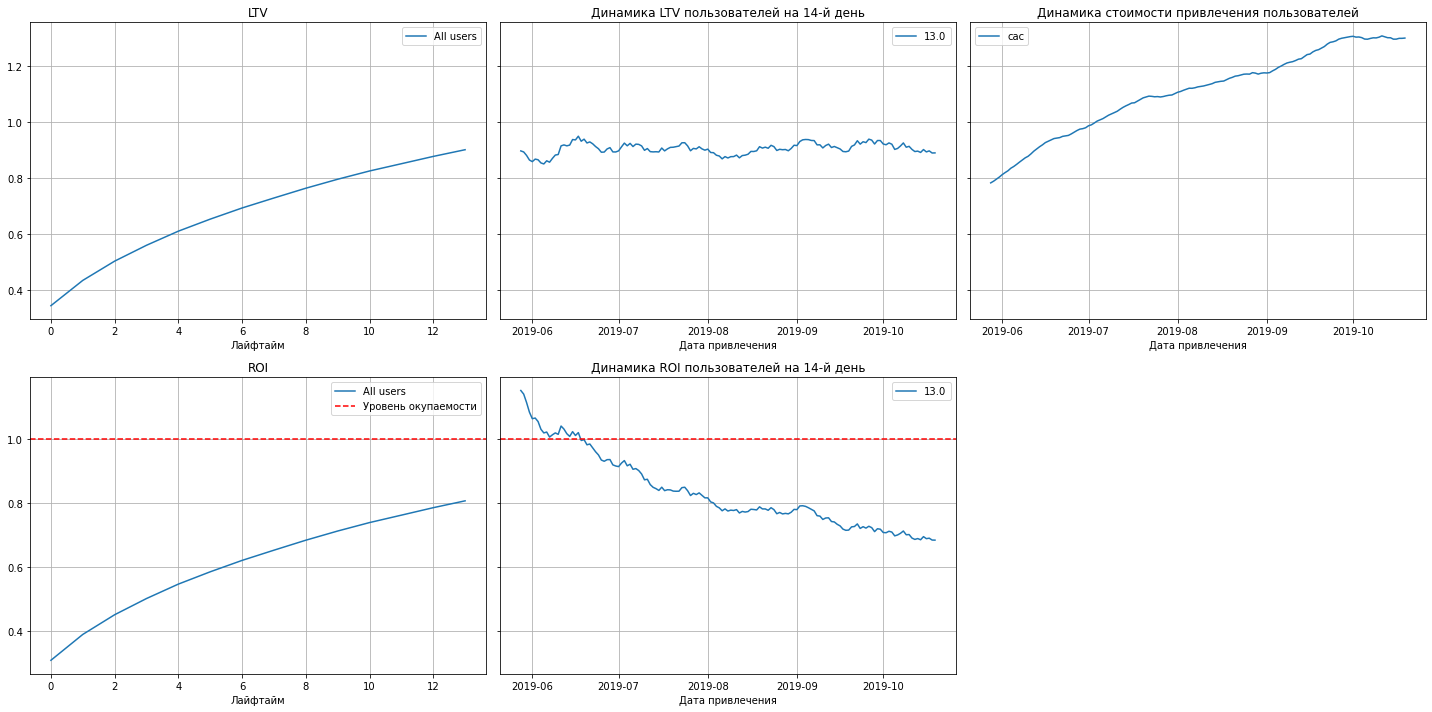

In [45]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=[]
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=28
) 

В целом рекламная кампания не окупается: LTV стабилен и держится на уровне 90%, ROI чуть выше 80%, стоимость привлечения пользователей стабильно растет и довольно высокими темпами, а окупаемость инвестиций в пользователя также стабильно падает.

Посмотрим на показатели окупаемости в разбивке по устройствам, регионам и каналам привлечения.

#### Окупаемость рекламы с разбивкой по устройствам

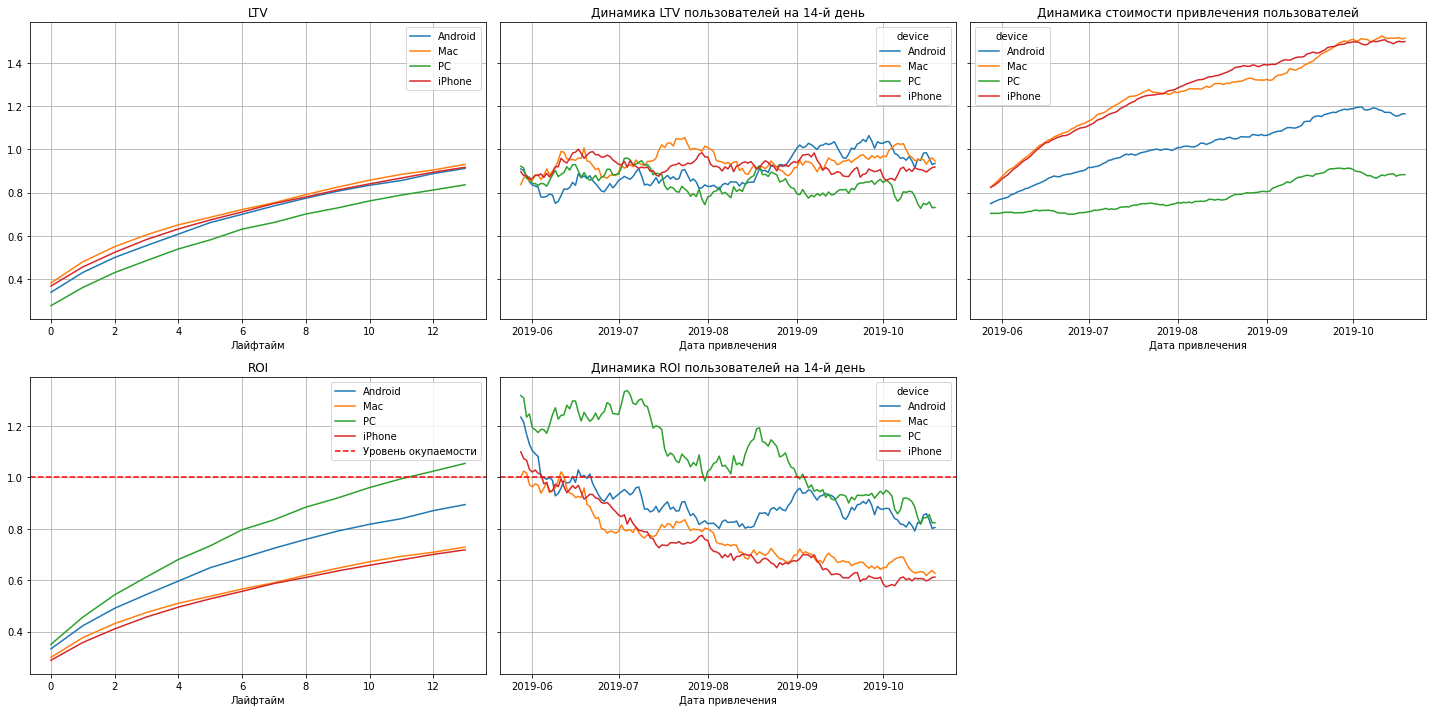

In [46]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=28
)

К концу второй недели реклама окупилась только для пользователей PC. По ним же меньше всего росла стоимость привлечения.

#### Окупаемость рекламы с разбивкой по странам

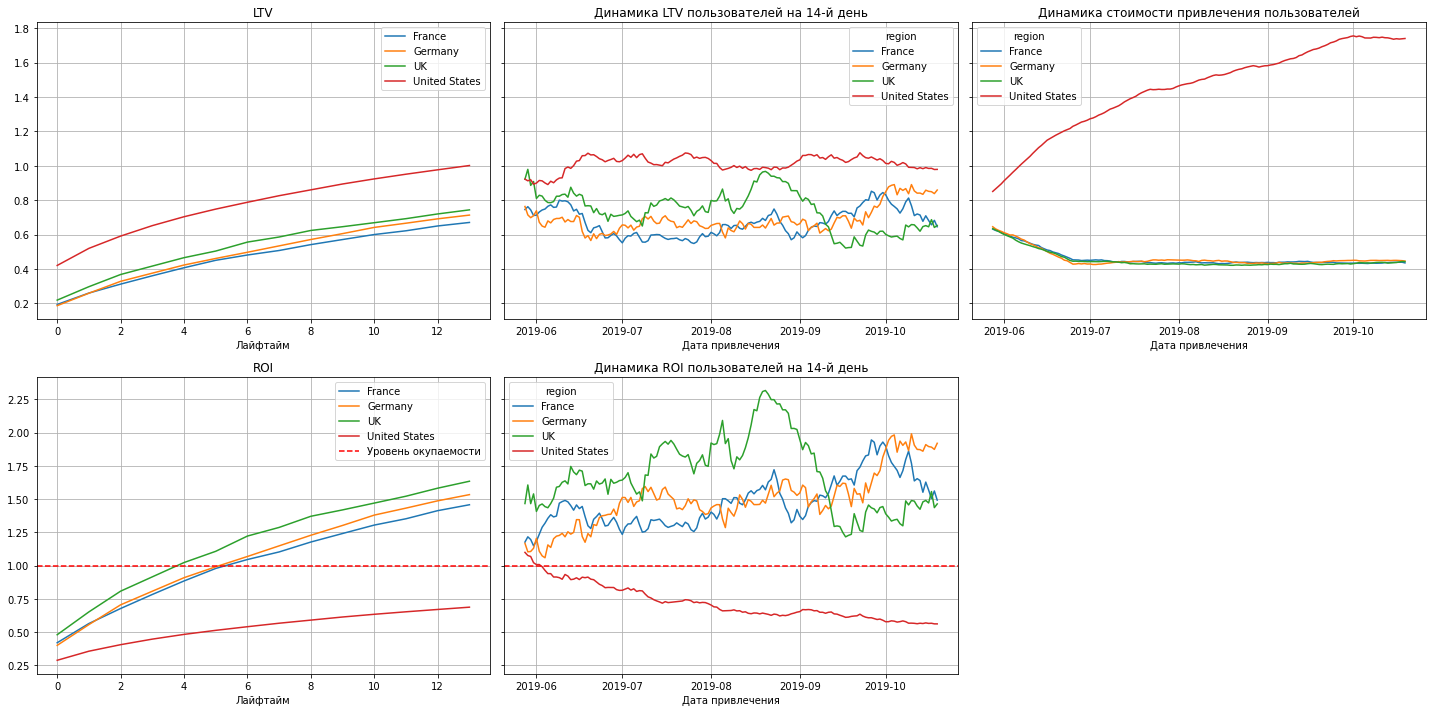

In [47]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=28
) 

Инвестиции в рекламу для пользователей из США не окупаются совсем, а в динамике окупаемость вообще падает. В то же время страны Европы показывают окупаетмость на уровне 150-175% к исходу второй недели продвижения.

#### Окупаемость рекламы с разбивкой по рекламным каналам

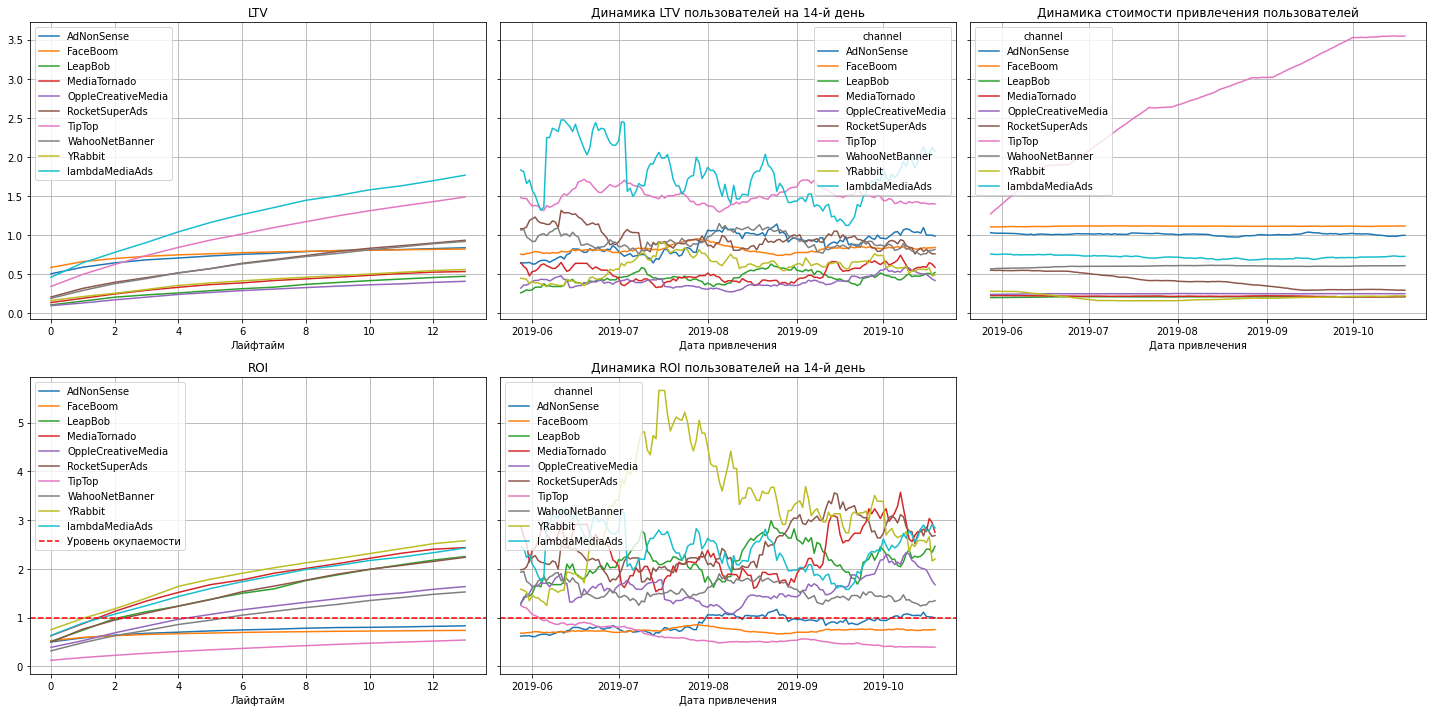

In [48]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=28
) 

7 из 10 каналов превысили уровень окупаемости уже к концу первой недели продвижения, а к концу второй недели вышли на стабильно высокие уровни окупаемости. Примечательно, что три канала-аутсайдера - FaceBoom, AdNonSense и TipTop - это каналы с самой высокой стоимостью привлечения пользователей. Вероятно, поэтому они и не окупаются.

Среди каналов, работающих с США, наилучшие показатели окупаемости у ~~YRabbit,~~ MediaTornado и RocketSuperAds. Среди европейских каналов привлечения пользователей хорошие показатели окупаемости у lambdaMediaAds и LeapBob.

**Выводы:**

Реклама, направленная на привлечение пользователей, не окупается: ROI чуть выше 80%, стоимость привлечения пользователей растет от месяца к месяцу, а окупаемость инвестиций в пользователя, напротив, стабильно падает.

Хуже всего дела обстоят на американском рынке. Конверсия пользователей из США выше, чем из других стран, в то же время, пользователи из США хуже удерживаются. Для платящих пользователей из США удержание 14-го дня почти на 10% ниже, чем для платящих пользователей из других стран.

Стоимость привлечения пользователей из США гораздо выше, чем из других стран. И на протяжении всего наблюдаемого периода она только растет. Это связано, в первую очередь, с каналами продвижения - два самых дорогостоящих канала продвижения - FaceBoom и TipTop - работают именно с пользователями из США. Окупаемость (ROI) этих каналов ниже единицы, а стоимость привлечения одного нового пользователя через канал TipTop выросла в 4 раза за период с мая по сентябрь 2019 года.

Проблемы с окупаемостью связаны с неправильным распределением бюджета на продвижение между каналами привлечения. Большинство пользователей приложения Procrastinate Pro+ приходят из США. Сейчас больше половины маркетингового бюджета тратится на канал продвижения TipTop, который показывает хорошую конверсию, но не окупается из-за высокой стоимости привлечения (2,8 доллара за пользователя). Преодолеть уровень окупаемости смогли только те каналы привлечения, у которых стоимость привлечения одного клиента составляет менее 1 доллара.

Так же проблемы с окупаемостью отдельных каналов (FaceBoom и AdNonSense) могут быть связаны с некорректным представлением пользователю информации о приложении, в результате чего пользователи быстро разочаровываются и уходят.

## Общий вывод

**Описание проекта**

Несмотря на огромные вложения в рекламу развлекательного приложения Procrastinate Pro+, последние несколько месяцев компания-собственник терпит убытки. 

**Задача**: выявить причины убытков и помочь компании выйти в плюс.

**Описание данных**

В доступе было три датасета с данными о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

   - лог сервера с данными об их посещениях (файл *visits_info_short.csv*);
   - выгрузка их покупок за этот период (файл *orders_info_short.csv*);
   - рекламные расходы (файл *costs_info_short.csv*).

Исследование состояло из следующих этапов:
 1. Изучение и предобработка данных
 2. Исследовательский анализ данных
 3. Маркетинговый анализ
 4. Оценка окупаемости рекламы
 
На этапе **изучения и предобработки данных** названия колонок были приведены к нижнему регистру и единому стилю snake_case, колонки с датами приведены к типу *datetime*. Пропусков и дубликатов в данных не выявлено.

**Исследовательский анализ данных** выявил следующие закономерности:
 - Пользователи приходят в приложение из США, Германии, Великобритании и Франции. Больше всего - из Соединенных Штатов Америки (более 100 тысяч клиентов). 
 - Чаще всего приложение устанавливают на iPhone, реже - на смартфоны на базе Android, еще реже - на персональные компьютеры.
 - Наибольшая доля платящих пользователей (от 9,6% до 12,2%) среди клиентов, привлеченных через каналы FaceBoom, TipTop (работают на американском рынке), AdNonSense и lambdaMediaAds (работают с пользователями из стран Европы).

В рассматриваемом периоде **расходы на маркетинг** составили **105,5 тысяч долларов**. Порядка 80% этой суммы ушло на привлечение пользователей из США через каналы TipTop и FaceBoom. 

**Дороже всего** обходятся пользователи, пришедшие из TipTop - в среднем *по 2,8 доллара* за нового пользователя. Это *в 2,5 раза дороже* средней стоимости привлечения нового пользователя через *FaceBoom* (1,1 долларов за пользователя) или *AdNonSense* (1,0 доллар за пользователя) и почти *в 4 раза дороже*, чем из *lambdaMediaAds* (0,72 доллара за пользователя). 

**В динамике САС** стабилен по всем каналам, кроме TipTop - стоимость привлечения одного пользователя поднимается каждые 5 недель и за 4 месяца (с мая по сентябрь) выросла почти в 3,5 раза.

**Реклама, направленная на привлечение пользователей, не окупается**: 

   - ROI на уровне 80%,
   - стоимость привлечения пользователей растет от месяца к месяцу,
   - окупаемость инвестиций в пользователя, напротив, стабильно падает.

**Конверсия пользователей из США** выше, чем из других стран, однако они хуже удерживаются. Для платящих пользователей из США удержание 14-го дня почти на 10% ниже, чем для платящих пользователей из других стран. 

**Преодолеть уровень окупаемости** смогли только те каналы привлечения, у которых стоимость привлечения одного клиента составляет менее 1 доллара. Среди каналов, работающих с США, **наилучшие показатели окупаемости** у *MediaTornado и RocketSuperAds*. Среди европейских каналов привлечения пользователей хорошие показатели окупаемости у *lambdaMediaAds и LeapBob*.
 
**Причины неэффективности привлечения пользователей**
 1. *Неэффективное расходование маркетингового бюджета*. Окупаемость двух самых дорогостоящих каналов продвижения - FaceBoom и TipTop - ниже единицы, а стоимость привлечения одного нового пользователя через канал TipTop выросла в 4 раза за период с мая по сентябрь 2019 года.
 2. *Некорректное представление пользователю информации о приложении*. Пользователи охотно устанавливают в приложение, но быстро разочаровываются и уходят.

**Рекомендации для отдела маркетинга**:
 1. *Пересмотреть распределение бюджета между каналами привлечения пользователей*. Целесообразно отказаться от услуг дорогостоящих каналов TipTop, FaceBoom и AdNonSense в пользу более дешевых каналов с хорошей окупаемостью: MediaTornado, RocketSuperAds, lambdaMediaAds и LeapBob.
 2. *Проверить корректность информации о приложении* в рекламных сообщениях на всех каналах привлечения пользователей.